### №1 Section for importing main libraries and defining main function

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics
from PIL import Image
from skimage.transform import rescale

def plot2figs(image1, image2, title):
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(image1, cmap=plt.cm.gray)
    plt.title('Original image')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(image2, cmap=plt.cm.gray)
    plt.title(title)
    plt.show()

### №2 Section for loading image

Original image


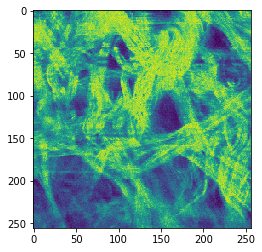

In [2]:
image = Image.open(os.path.join('../bin_data', 'collagen.png'))
print('Original image')
plt.imshow(image)
plt.show()

### №3 Section for fractal dimention

In [3]:
def box_counter(image, k):
    S = np.add.reduceat(
        np.add.reduceat(image, np.arange(0, image.shape[0], k), axis=0),
                               np.arange(0, image.shape[1], k), axis=1)
    return len(np.where((S > 0) & (S < k**2))[0])

def fractal_dimension(image, threshold=0.7):
    assert(len(image.shape) == 2)
    # Binarization
    image = (image < threshold)
    # Calculating greatest power of 2
    n = 2**np.floor(np.log(min(image.shape))/np.log(2))
    # Calculating size
    sizes = 2**np.arange(int(np.log(n)/np.log(2)), 1, -1)
    # Box counting using iteration by all sizes
    boxes_number = []
    [boxes_number.append(box_counter(image, size)) for size in sizes]
    # Formula for Minkowski dimention
    results = -np.polyfit(np.log(sizes), np.log(boxes_number), 1)[0]
    return results

image = np.asarray(image)
rescaled = rescale(image, 0.75)
print('Fractal dimention is ', fractal_dimension(rescaled))


Fractal dimention is  1.6468308181298494
